<h1><u>Global Happiness Index Indicators - 2022</u></h1>

# Table of Contents

* [Goals](#Goals)</br>
* [Questions](#Questions)</br>
* [Data](#Data)</br>
    * [Load the Data](#Load-the-Data)</br>
    * [Explore the Data](#Explore-the-Data)</br>
    * [Clean the Data](#Clean-the-Data)</br>
    * [Data Information](#Data-Information)</br>
* [Analysis](#Analysis)</br>
    * [Correlation Heatmap](#Correlation-Heatmap)</br>
    * [Understanding Distributions](#Understanding-Distributions)</br>
    * [Statistics by Region](#Statistics-by-Region)</br>
* [Conclusions](#Conclusions)</br>
* [Actionable Insights](#Actionable-Insights)</br>
* [Interactive Visualizations](#Interactive-Visualizations)

<h2>Goals</h2>

<ul>
    <li>Determine which (if any) common economic and social variables have the strongest correlation with a country's Happiness Index.</li>
    <li>Develop actionable recomendations for communities that wish to increase their happiness index</li>
</ul>

<h2>Questions</h2>

`Question 1:` Which variables have the strongest correlation with the happiness index of a country?</br>
`Question 2:` What is the distribution of these variables with the strongest correlations with the happiness index?</br>
`Question 3:` Which regions are the happiest? Richest? Most dangerous? How do these stats compare to the happiness index?

<h2>Data</h2>

This data was downloaded from Kaggle. It consists of two datasets:

[Crime Economics](https://www.kaggle.com/datasets/shubhrojyotidey/crime-economics)</br>
[World Happiness Index Report](https://www.kaggle.com/datasets/ankurkaiser/world-happiness-index-report)

<u>Column Descriptions</u>

Some columns are not immeditely clear on their meaning. Here is a quick description of those columns:

   `hdi` - composite index of a country's achievements in health, knowledge, and income (measured 0 to 1, with 1 being high)   
   `gini_coefficient` - index that measures wealth distribution within a country (measured 0 to 1, with 0 being equal wealth distribution

<h3>Load the Data</h3>

First, the libraries required by this project are imported. Each file is loaded separately. Some columns that are unnessesary for this project are dropped to improve data cleanliness. The two DataFrames are joined on the coutnry column.

In [44]:
# import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors as mcolors

In [3]:
# load crime data
crime_data = pd.read_csv('crime-economics-data.csv')
crime_data.head()

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.00,12.5,508.00,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.00,12.0,"5,181.00",33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.00,2.1,"3,368.00",27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.00,7.4,"8,476.00",41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.00,6.1,"4,266.00",34.4,1.00,5.28


In [4]:
# load happiness data
happy_data = pd.read_csv('world-happiness-report-2021.csv')
happy_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


<h3>Explore the Data</h3>

Make sure we understand the data we are working with. Things to keep in mind:

<ul>
    <li>column names</li>
    <li>number of rows</li>
    <li>column datatypes</li>
    <li>missing data</li>
</ul>

Let's gain an understanding of our data before we begin analysis.

In [5]:
# inspect columns of both dataframes
crime_data.columns
happy_data.columns

crime_data['Country'].nunique()
happy_data['Country name'].nunique()

149

In [6]:
crime_data.dtypes

Country                             object
Crime Rate                         float64
Unemployment (%)                   float64
HDI                                float64
Population Density (per sq. km)     object
Weapons per 100 persons            float64
Per Capita Income                   object
Gini Coefficient                   float64
Literacy Rate                      float64
Happiness Index                    float64
dtype: object

Note: the `Population Density (per sq. km)` and `Per Capita Income` columns in `crime_data` are currently `object` datatypes. This will cause issues when we want to run calculations later. Let's convert them to floats.

In [7]:
# convert to numeric values
crime_data['Population Density (per sq. km)'] = pd.to_numeric(crime_data['Population Density (per sq. km)'], errors='coerce')
crime_data['Per Capita Income'] = pd.to_numeric(crime_data['Per Capita Income'], errors='coerce')

<h3>Clean the Data</h3>

`happy_data` has several columns that we will not be using, as they are calculated fields of other columns in the DataFrame. Let's drop those columns.

In [8]:
# drop calculated columns
happy_data = happy_data.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1)

happy_data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


For more efficient code later, the column names in each dataframe will be shortened and converted to snake case using a lambda function.

In [9]:
# rename lengthy columns
happy_data = happy_data.rename(columns={'Country name': 'Country', 'Regional indicator': 'Region', 'Logged GDP per capita': 'GDP per capita', 'Healthy life expectancy': 'Life expectancy', 'Freedom to make life choices': 'Freedom index'})

# convert column names to snake case
happy_data = happy_data.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [10]:
crime_data = crime_data.rename(columns={'Unemployment (%)': 'unemployment rate', 'population_density_(per_sq._km)': 'population density'})
crime_data = crime_data.rename(columns=lambda x: x.lower().replace(' ', '_'))

To make accessing data between the two dataframes easier, they should be merged on the `Country` column.

We know that not all countries exist within both tables. Because it is important to have accurate data, we will only keep the countries that are included in both tables.

Note: both `crime_data` and `happy_data` contain a column with a happiness index (`happiness_index` and `ladder_score` respectively). They contain the same data, the only difference being the `happy_data` column contains 1 more decimal place than the `crime_data` column. We can drop the `happiness_column` from `crime_data`.

In [11]:
# drop the redundant column
crime_data = crime_data.drop(['happiness_index'], axis=1)

In [12]:
# merge both dataframes
all_data = pd.merge(happy_data, crime_data, on='country', how='inner')

# rename pop density column for ease
all_data = all_data.rename(columns={'population_density_(per_sq._km)': 'population_density'})

Now we have a single table, `all_data`, containing only the data we plan on using, all formatted properly and consistently. Let's do one last pass through our data to make sure we fully understand it.

In [13]:
all_data.dtypes

country                       object
region                        object
ladder_score                 float64
gdp_per_capita               float64
social_support               float64
life_expectancy              float64
freedom_index                float64
generosity                   float64
perceptions_of_corruption    float64
crime_rate                   float64
unemployment_rate            float64
hdi                          float64
population_density           float64
weapons_per_100_persons      float64
per_capita_income            float64
gini_coefficient             float64
literacy_rate                float64
dtype: object

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    113 non-null    object 
 1   region                     113 non-null    object 
 2   ladder_score               113 non-null    float64
 3   gdp_per_capita             113 non-null    float64
 4   social_support             113 non-null    float64
 5   life_expectancy            113 non-null    float64
 6   freedom_index              113 non-null    float64
 7   generosity                 113 non-null    float64
 8   perceptions_of_corruption  113 non-null    float64
 9   crime_rate                 113 non-null    float64
 10  unemployment_rate          113 non-null    float64
 11  hdi                        113 non-null    float64
 12  population_density         109 non-null    float64
 13  weapons_per_100_persons    113 non-null    float64

In [15]:
# drop the income column
all_data = all_data.drop(['per_capita_income'], axis=1)

Lastly, before analysis begins, let's change the column `ladder_score` to `happiness_index` for greater clarity.

In [17]:
all_data = all_data.rename(columns={'ladder_score': 'happiness_index'})

In [18]:
all_data.head()

,country,region,happiness_index,gdp_per_capita,social_support,life_expectancy,freedom_index,generosity,perceptions_of_corruption,crime_rate,unemployment_rate,hdi,population_density,weapons_per_100_persons,gini_coefficient,literacy_rate
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,27.59,8.4,0.94,16.0,32.4,27.4,0.99
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,26.22,5.7,0.94,133.0,9.9,28.7,0.99
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,21.62,5.1,0.96,207.0,27.6,32.7,0.99
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,23.75,7.2,0.95,3.0,31.7,26.8,0.99
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,27.16,12.8,0.94,457.0,2.6,28.5,0.99


<h4>Data Information</h4>

After inspecting our data, we can draw some basic insights:

<ul>
    <li>Our data consists of 17 columns and 113 rows</li>
    <li>Aside from `country` and `region`, all columns are numeric</li>
    <li>There are 4 null values in `population_density`. They will be replaced with 0 to prevent errors.</li>
    <li>The `income_per_capita` column is almost entirely empty, making it useless. We can drop it or replace with other data</li>
</ul>

We are now ready for analysis.

<h2>Analysis</h2>

<h3>Correlation Heatmap</h3>

Because we are interested in determining which variables have the strongest influence on the happiness index, it makes sense to generate a correlation heatmap to see if we can gain meaningful insight.

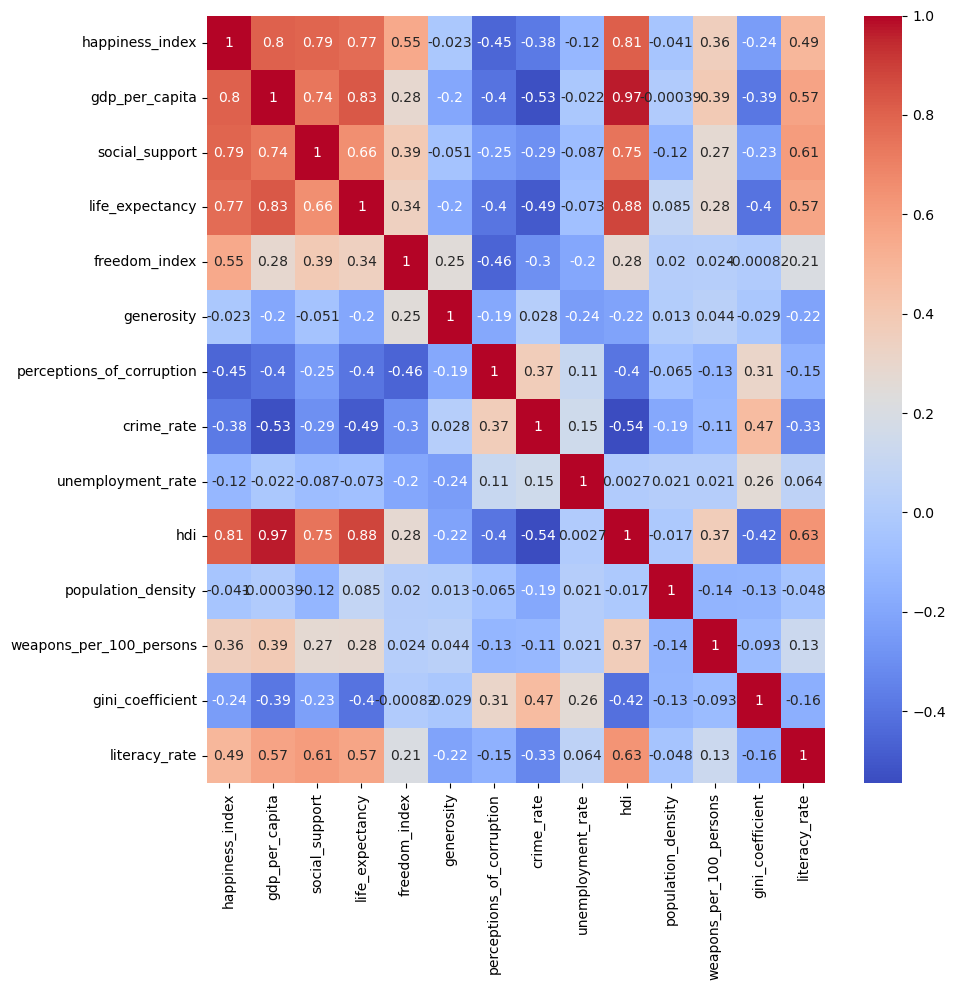

In [19]:
corr_matrix = all_data.corr()

# heat matrix that shows correlation across all numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

<b>Heatmap Insights</b>

This correlation heatmap allows us to answer <b>Question 1</b>.

<b>Question 1: Which Variables Are Most Strongly Correlated With the Happiness Index of a Country?</b>

3 variables displayed statistically strong positive correlations with the happiness index: `hdi`, `gdp_per_capita`, `social_support`.

We can reasonably expect that a country's happiness index is high when:

<ul>
    <li>The HDI Index is high</li>
    <li>GDP is high</li>
    <li>Social support systems have been developed</li>
</ul>

There are other correlations worth discussing as well. For example `gpd_per_capita` has a near perfectly positive correlation with `hdi`. One conclusion from this insight is that countries with more wealth can make larger investmetns into its population in the form of education, health, and other areas of human development. This may be one explanation as to why there is a strong correlation between `hdi` and `life_expectancy`, as well as between `life_expectancy` and `gdp`.

Negative correlations can be just as insightful as positive correlations. While there are no variables that have a statistically strong negative correlation with any other variables in this dataset, there are a few relationships with moderate negative correlation worth noting.

`crime_rate` has moderate negative correlations with several variables in this dataset: `gdp_per_capita`, `life_expectancy`, `hdi`,and `literacy_rate`.

This allows us to resonably deduce that crime rates tends to be higher in countries where:

<ul>
    <li>GDP is low</li>
    <li>Life expectancy is poor</li>
    <li>HDI index is poor</li>
    <li>Literacy rates are low</li>
</ul>

It is also worth noting that crime rate has the second highest negative correlation to the happiness index, behind perceptions of corruption within a country.

<u>Happiness Index Correlation Breakdowns</u>

Variables With Strong Correlation

   1. `hdi` at `0.81`
   2. `gpd_per_capita` at `0.80`
   3. `social_support` at `0.79`
   4. `life_expectancy` at `0.77`
   
Variables With Moderate Correlation

   1. `freedom_index` at `0.55`
   2. `literacy_rate` at `0.49` (not exactly `0.5` but close enough for our purposes)
    
Variables With Weak Correlation

   1. `perceptions_of_corruption` at `-0.45`
   2. `crime_rate` at `-0.38`
   3. `weapons_per_100_persons` at `0.36`
   
Variables With No Correlation

   1. `gini_coefficient` at `-0.24`
   2. `unemployment_rate` at `-0.12`
   3. `population_density` at `-0.041`
   4. `generosity` at `-0.023`   
    
<small><i>Variables are considered strongly correlated when the r-value is greater than `0.7` or less than `-0.7`. Variables with r-values between `0.7` and `0.5` or between `-0.7` and `-0.5` are considered moderately correlated. Variables with r-values between `0.5` and `0.3` or between `-0.5` and `-0.3` are considered weakly correlated. Variables with r-values between `0.3` and `-0.3` are not considered to be correlated.</i></small)

<h3>Understanding Distributions</h3>

Now that we have an understanding of correlations among variables in this data set, let's explore their distributions.

<u>Global HDI Distribution</u>

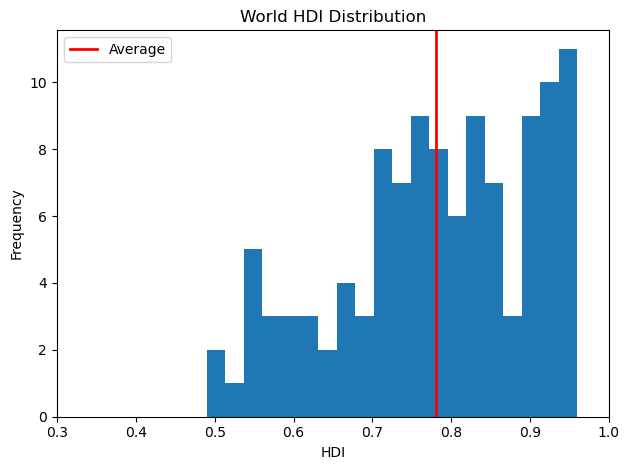

In [20]:
# isolate hdi data
hdi_data = all_data['hdi']

# calculate avg hdi
avg_hdi = np.mean(hdi_data)

# plot the data
plt.hist(hdi_data, bins=20)
plt.axvline(avg_hdi, color='red', linewidth=2, label='Average')
plt.title('World HDI Distribution')
plt.xlabel('HDI')
plt.ylabel('Frequency')
plt.xlim(0.3, 1)
plt.tight_layout()
plt.legend()
plt.show()

In [21]:
hdi_data.skew()

-0.4755227242754818

There is no large skew in the HDI distribution. While it it not a normal distribution in the general sense (a bell curve), this distribution can be considered normal because data ends right near the maximum possible value (1.0). A gradual incline begins from 0.5, up to 0.95, as we would expect from data of this nature. Nothing sgnificant noted.

<u>Global GDP Distribution</u>

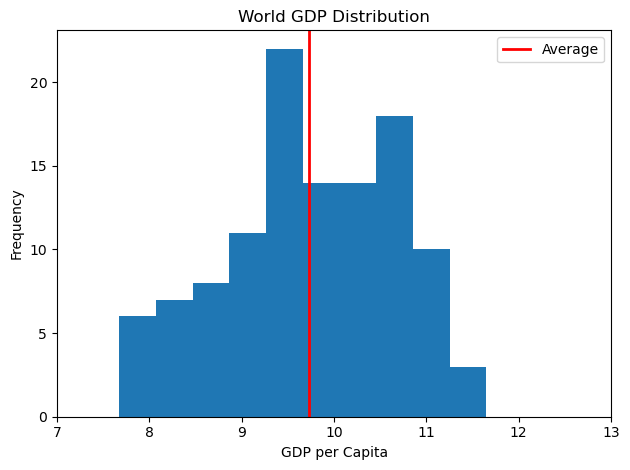

In [22]:
# isolate gdp data
gdp_data = all_data['gdp_per_capita']

# calculate avg gdp
avg_gdp = np.mean(gdp_data)

# plot the data
plt.hist(gdp_data, bins=10)
plt.axvline(avg_gdp, color='red', linewidth=2, label='Average')
plt.title('World GDP Distribution')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.xlim(7, 13)
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
gdp_data.skew()

-0.3291779366527163

There is normal distribution of GDP. There are no outliers. Nothing significant to note.

<u>Gloabl Social Support Rating Distribution</u>

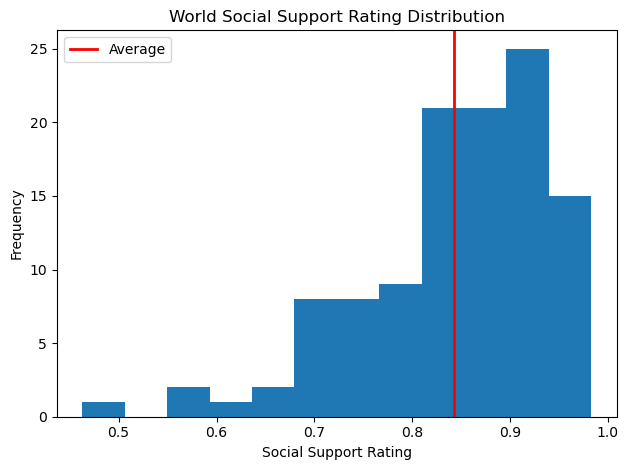

In [24]:
# isolate social data
social_data = all_data['social_support']

# calculate avg crime rate
avg_social = np.mean(social_data)

# plot the data
plt.hist(social_data, bins=12)
plt.axvline(avg_social, color='red', linewidth=2, label='Average')
plt.title('World Social Support Rating Distribution')
plt.xlabel('Social Support Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

In [25]:
social_data.skew()

-1.2677394197621163

Note the left-skew (toward a lower social support rating). This indicates the presence of outliers, countries with low social support ratings. Remeber that `social_support` had a strong positive correlation with `happiness_index`.

<u>Global Life Expectancy Distribution</u>

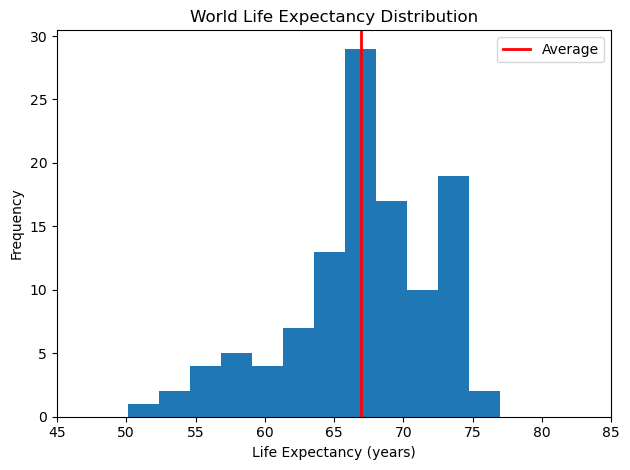

In [26]:
# isolate social data
life_exp_data = all_data['life_expectancy']

# calculate avg crime rate
avg_life_exp = np.mean(life_exp_data)

# plot the data
plt.hist(life_exp_data, bins=12)
plt.axvline(avg_life_exp, color='red', linewidth=2, label='Average')
plt.title('World Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.xlim(45, 85)
plt.tight_layout()
plt.legend()
plt.show()

In [27]:
life_exp_data.skew()

-0.7753632081774594

This is a mostly normal distribution with slight left skew (toward a lower life expectancy). Remember that `life_expectancy` is strongly correlated with `happiness_index`, `gdp_per_capita`, and `hdi`. The distribution is similar to those variables distribution's, more evidence of a relationship between them.

<u>Global Crime Rate Distribution</u>

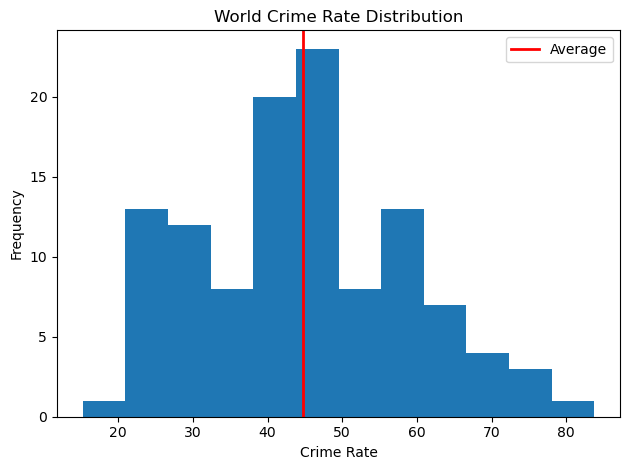

In [28]:
# isolate crime rate data
crime_rate_data = all_data['crime_rate']

# calculate avg crime rate
avg_crime_rate = np.mean(crime_rate_data)

# plot the data
plt.hist(crime_rate_data, bins=12)
plt.axvline(avg_crime_rate, color='red', linewidth=2, label='Average')
plt.title('World Crime Rate Distribution')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
# calculate skewness
crime_rate_data.skew()

0.2584649557815173

Global crime rate has a mostly normal distribution. It appears very slightly right-skewed (toward higher crime rates).

<u>Global Gini Coefficient Distribution</u>

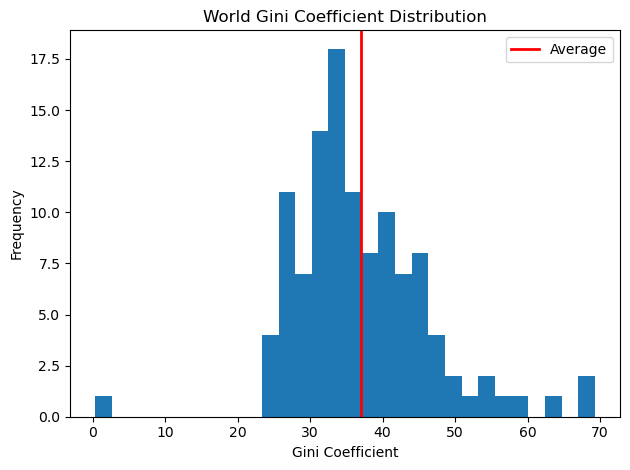

In [30]:
# isolate gini data
gini_data = all_data['gini_coefficient']

# calculate avg gini
avg_gini = np.mean(gini_data)

# plot the data
plt.hist(gini_data, bins=30)
plt.axvline(avg_gini, color='red', linewidth=2, label='Average')
plt.title('World Gini Coefficient Distribution')
plt.xlabel('Gini Coefficient')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

In [31]:
# calculate skewness
gini_data.skew()

0.5953656734649553

This is a mostly normal distribution, but note there is again a moderate right skew (toward higher Gini Coefficients). This indicates some countries with significant wealth inequality.

The outlier near 0 is likely an error in data recording. It can be disregarded.

<u>Global Freedom Index Distribution</u>

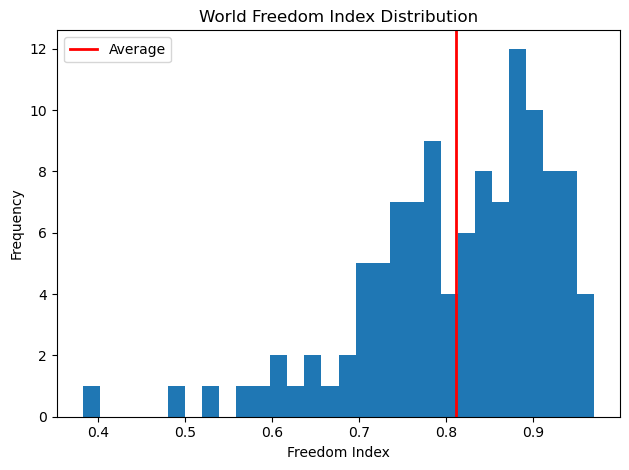

In [32]:
# isolate freedom index data
freedom_data = all_data['freedom_index']

# calculate avg freedom index
avg_freedom = np.mean(freedom_data)

# plot the data
plt.hist(freedom_data, bins=30)
plt.axvline(avg_freedom, color='red', linewidth=2, label='Average')
plt.title('World Freedom Index Distribution')
plt.xlabel('Freedom Index')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

In [33]:
freedom_data.skew()

-1.125784887712621

This is a bimodal distribution with heavy left skew (toward a lower freedom index). This indicates that while most of the world enjoys many freedoms, there are a few countries with severe limitations on personal freedoms. Remember that there was a moderate positive correlation between `freedom_index` and `happiness_index`.

<u>Global Unemployment Rate Distribution</u>

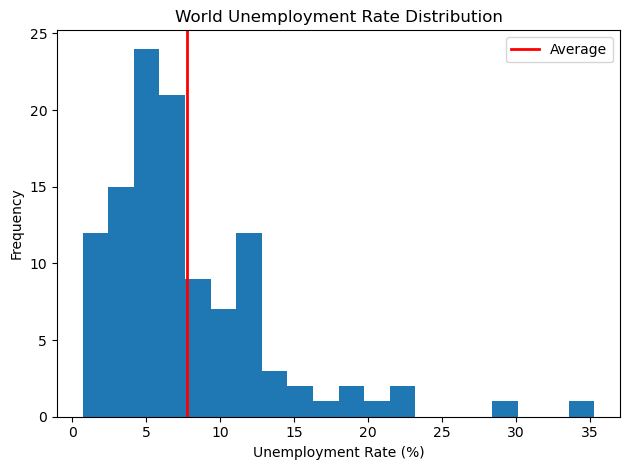

In [34]:
# isolate unemployment data
unemployment_data = all_data['unemployment_rate']

# calculate avg unemployment
avg_unemployment = np.mean(unemployment_data)

# plot the data
plt.hist(unemployment_data, bins=20)
plt.axvline(avg_unemployment, color='red', linewidth=2, label='Average')
plt.title('World Unemployment Rate Distribution')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

Which countries are the outliers?

In [85]:
high_ur = all_data.sort_values('unemployment_rate', ascending=False)

high_ur[0:2]

,country,region,happiness_index,gdp_per_capita,social_support,life_expectancy,freedom_index,generosity,perceptions_of_corruption,crime_rate,unemployment_rate,hdi,population_density,weapons_per_100_persons,gini_coefficient,literacy_rate
85,South Africa,Sub-Saharan Africa,4.956,9.403,0.860,56.904,0.749,-0.067,0.860,76.86,35.3,0.71,47.0,9.7,63.0,0.94
44,Mauritius,Sub-Saharan Africa,6.049,10.008,0.905,66.701,0.867,-0.054,0.789,48.88,30.0,0.80,644.0,8.3,36.8,0.91


South Africa and Mauritas are the outliers for unemployment rate.

In [35]:
unemployment_data.skew()

2.0622165369242262

This is a unimodal distribution with extreme right-skew (toward a higher unemployment rate). There are several factors that may help explain the skewness, but more data will be required to verify these possible explanations:

<ul>
    <li>Local Crisis (war, natural disaster, etc)</li>
    <li>Lag In Economic Development</li>
</ul>

It is important to note this data is from 2021, when much of the world was still in economic recovery from the COVID-19 pandemic.

<u>Gloabl Weapons Per 100 People</u>

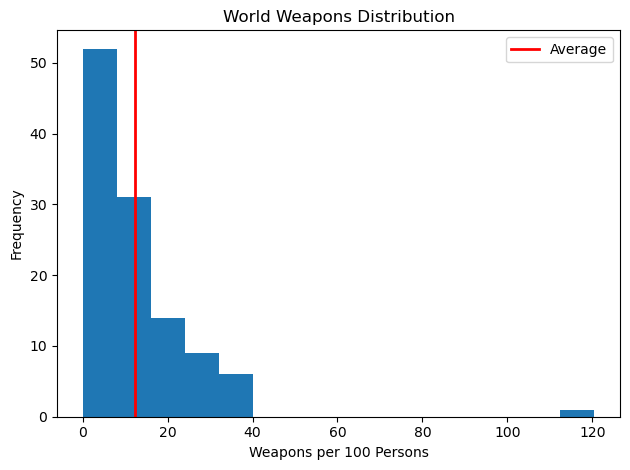

In [36]:
# isolate weapon data
weapons_data = all_data['weapons_per_100_persons']

# calculate avg weapons
avg_weapons = np.mean(weapons_data)

# plot the data
plt.hist(weapons_data, bins=15)
plt.axvline(avg_weapons, color='red', linewidth=2, label='Average')
plt.title('World Weapons Distribution')
plt.xlabel('Weapons per 100 Persons')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
weapons_data.skew()

4.135790982692225

This distribution displays extreme right skew (toward more weapons per 100 persons). Most of the skewness comes from a single otlier (we can all guess which country that is). There was a weak positive correlation between `weapons_per_100_persons` and `happiness_index`.

<h3>Statistics by Region</h3>

We are interested in comparing some variables by region. The key variables we are interested in are `happiness_index`, `gdp_per_capita`, and `crime_rate`.

We need to first know the regions we are working with.

In [49]:
regions = all_data['region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'East Asia', 'South Asia'], dtype=object)

For these comparisons, let's create shorter versions of the names of the regions for cleaner charts.

In [74]:
# create aliases for each region
region_aliases = {'Western Europe': 'W EU',
                 'North America and ANZ': 'NA & ANZ',
                 'Middle East and North Africa': 'ME & NA',
                 'Latin America and Caribbean': 'LA & CAR',
                 'Central and Eastern Europe': 'C & E EU',
                 'Southeast Asia': 'SE Asia',
                 'Commonwealth of Independent States': 'CIS',
                 'Sub-Saharan Africa': 'Sub-S Afr',
                 'East Asia': 'E Asia',
                 'South Asia': 'S Asia'}


<b>Happiness Index by Region</b>

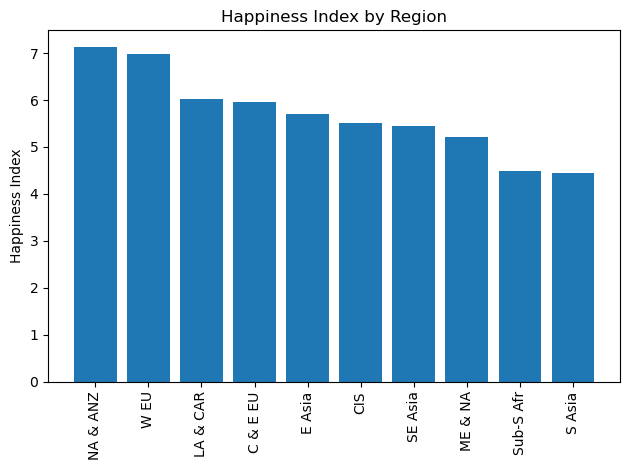

In [76]:
# group data by region and calculate avg happiness index
avg_happiness_by_region = all_data.groupby('region')['happiness_index'].mean()

# sort this data from high to low
avg_happiness_by_region = avg_happiness_by_region.sort_values(ascending=False)

# set x ticks from region to their correspopnding shortened value
xtick_labels = [region_aliases.get(label, label) for label in avg_happiness_by_region.index]

#plot the data in a bar chart
plt.bar(avg_happiness_by_region.index, avg_happiness_by_region.values)
plt.title('Happiness Index by Region')
plt.ylabel('Happiness Index')
plt.xticks(avg_happiness_by_region.index, xtick_labels, rotation=90)
plt.tight_layout()
plt.show()

`NA & ANZ` and `W EU` show the highest average happiness index. They have a nearly entire index point lead over the rest of the regions, a stat worthy of noting. `Sub-S Afr` and `S Asia` have the lowest average happiness rating.

<small><small><small><i>**the xticks on this chart and the following charts are the aliases of the full region names, shorted for aesthtic purposes. Reference the `region_aliases` for their corresponding full names.</i>

<b>GDP Per Capita by Region</b>

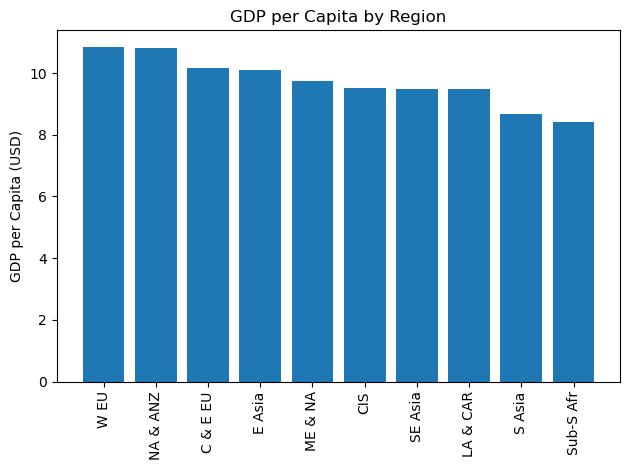

In [77]:
# group data by region and calculate avg gdp per capita
avg_gdp_by_region = all_data.groupby('region')['gdp_per_capita'].mean()

# sort this data from high to low
avg_gdp_by_region = avg_gdp_by_region.sort_values(ascending=False)

# set x ticks from region to their correspopnding shortened value
xtick_labels = [region_aliases.get(label, label) for label in avg_gdp_by_region.index]

#plot the data in a bar chart
plt.bar(avg_gdp_by_region.index, avg_gdp_by_region.values)
plt.title('GDP per Capita by Region')
plt.ylabel('GDP per Capita (USD)')
plt.xticks(avg_gdp_by_region.index, xtick_labels, rotation=90)
plt.tight_layout()
plt.show()

As with the happiness index, `NA & ANZ` and `W EU` show the highest average GDP per capita, while `Sub-S Afr` and `S Asia` have the lowest average GDP per capita. This is more evidence of a strong relationship between GDP per capita and the happiness index.

<b>Crime Rate by Region</b>

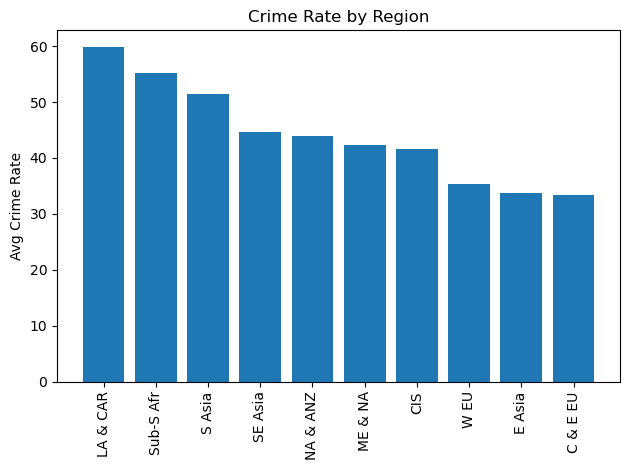

In [78]:
# group data by region and calculate avg crime rate
avg_crime_rate_by_region = all_data.groupby('region')['crime_rate'].mean()

# sort this data from high to low
avg_crime_rate_by_region = avg_crime_rate_by_region.sort_values(ascending=False)

# set x ticks from region to their correspopnding shortened value
xtick_labels = [region_aliases.get(label, label) for label in avg_crime_rate_by_region.index]

#plot the data in a bar chart
plt.bar(avg_crime_rate_by_region.index, avg_crime_rate_by_region.values)
plt.title('Crime Rate by Region')
plt.ylabel('Avg Crime Rate')
plt.xticks(avg_crime_rate_by_region.index, xtick_labels, rotation=90)
plt.tight_layout()
plt.show()

`LA & CAR` show the highest crime rate, while all European regions and `E Asia` have the lowest crime rates. This is interesting because even while having the highest crime rate, `LA & CAR` also have the third highest average happiness index. However, this is not too concerning as the relationship between `crime_rate` and `happiness_index`displayed a weak negative correlation.

<h2>Conclusions</h2>

HDI Index, GDP per capita, and social support ratings have the strongest positive correlations with a country's Happiness Index. Citizen perception of corruption, crime rates, and weapons density had the strongest relative negative correlation with a country's Happiness Index, though the negative correlation was moderate to weak, and thus not reliable indicators for a country's Happiness Index.

HDI Index and GDP per capita show normal distributions. However, the distribution of social support ratings shows a significant left-skew, indicating outliers where social support systems are underdeveloped.

The happiest regions are also the wealthiest regions by GDP per capita, further evidence of the strong relationship between wealth and happiness.

<h2>Actionable Insights</h2>

While wealth seems to be the greatest indicator of happiness in communities, economic growth and development is already a top priority for most governments around the world. Instead, we can focus on the other factors with strong correlations to happiness indicators.

Because of the strong positive correlation between social support ratings and the happiness index, countries looking to improve their happiness index should consider investing into social support systems for their communities. Some examples include:

<ul>
    <li>improving educational systems</li>
    <li>development of communication channels</li>
    <li>expanding access to information</li>
    <li>investing in services like healthcare, transportation, etc.</li>
</ul>

These investments will also contribute the an increased HDI Index, the strongest indicator of a country's happiness index.

<h2>Interactive Visualizations</h2>

Use the interactive visualizations for this data on Tableau:

[Happiness Index Indicators 2021](https://public.tableau.com/app/profile/bradley.gauss/viz/HappinessIndexIndicators2021/Sheet1) by Bradley Gauss